In [3]:
import tensorflow as tf
import numpy as np

# **Basics**
creating some basic tensors.

A "scalar" or "rank-0" tensor . A scalar contains a single value, and no "axes".

Scalar 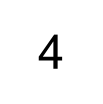
Vector 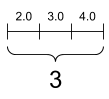
Matrix 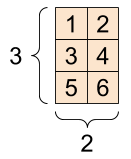

In [4]:
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


A "vector" or "rank-1" tensor is like a list of values. A vector has 1-axis:

In [5]:
rank_1_tensor = tf.constant([2.0, 3, 5.6])
print(rank_1_tensor)

tf.Tensor([2.  3.  5.6], shape=(3,), dtype=float32)


A "matrix" or "rank-2" tensor has 2-axes:

In [6]:
rank_2_tensor = tf.constant([[1,2],
                             [3,4],
                             [5,6], 
                             ])
print(rank_2_tensor)

tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)


In [7]:
# There can be an arbitrary number of
# axes (sometimes called "dimensions")
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])

print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


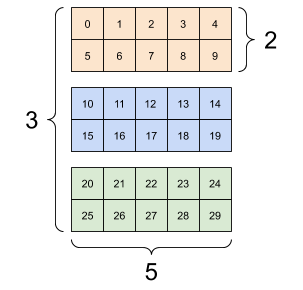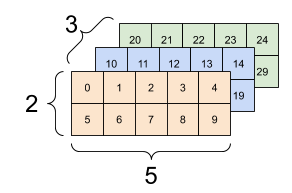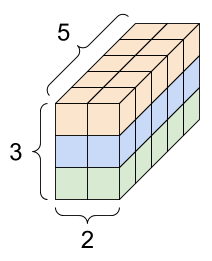

 can convert a tensor to a NumPy array either using np.array or the tensor.numpy method:



In [8]:
rank_2_tensor.numpy()

array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)

In [9]:
np.array(rank_2_tensor)

array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)

Tensors often contain floats and ints, but have many other types, including:

*   complex numbers
*   strings

The base tf.Tensor class requires tensors to be "rectangular"---that is, along each axis, every element is the same size. However, there are specialized types of tensors that can handle different shapes:


*   Ragged tensors (see [RaggedTensor](#ragged_tesonrs) below)
*   Sparse tensors (see [SparseTensor](#sparse_tensors) below)




basic math on tensors, including addition, element-wise multiplication, and matrix multiplication.

In [10]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]]) # Could have also said `tf.ones([2,2])`

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

#Shorthand of the same
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [11]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])

# Find the largest value
print(tf.reduce_max(c))
# Find the index of the largest value
print(tf.argmax(c))
# Compute the softmax
print(tf.nn.softmax(c))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor(
[[2.6894143e-01 7.3105860e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)


Tensors have shapes. Some vocabulary:


* **Shape:** The length (number of elements) of each of the dimensions of a tensor.
* **Rank**: Number of tensor dimensions. A scalar has rank 0, a vector has rank 1, a matrix is rank 2.

* **Axis or Dimension**: bold textA particular dimension of a tensor.
* **Size**: The total number of items in the tensor, the product shape vector

Tensors and tf.TensorShape objects have convenient properties for accessing these:





In [12]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])
print(rank_4_tensor)

tf.Tensor(
[[[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]], shape=(3, 2, 4, 5), dtype=float32)


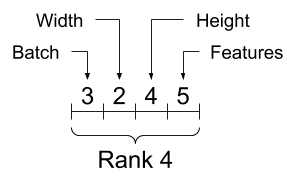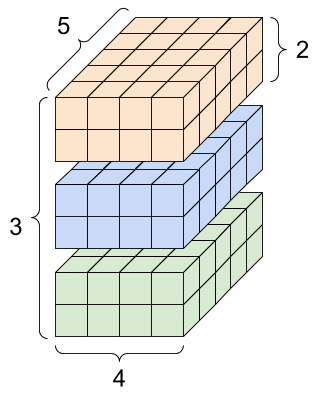

In [13]:
print("Type of every element:", rank_4_tensor.dtype)
print("Number of dimensions:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of dimensions: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


# **Indexing**
Single-axis indexing
TensorFlow follows standard Python indexing rules, [similar to indexing a list or a string in Python](https://docs.python.org/3/tutorial/introduction.html#strings), and the basic rules for NumPy indexing.

indexes start at 0
negative indices count backwards from the end
colons, :, are used for slices: start:stop:step


In [14]:
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())
print("===========================================================================================================================")
print("First:", rank_1_tensor[0].numpy())
print("Second:", rank_1_tensor[1].numpy())
print("Last:", rank_1_tensor[-1].numpy())
print("===========================================================================================================================")
print("Everything:", rank_1_tensor[:].numpy())
print("Before 4th element:", rank_1_tensor[:4].numpy())
print("From 4th element to the end:", rank_1_tensor[4:].numpy())
print("From 2nd element, before 7:", rank_1_tensor[2:7].numpy())
print("Every other item:", rank_1_tensor[::2].numpy())
print("Reversed:", rank_1_tensor[::-1].numpy())

[ 0  1  1  2  3  5  8 13 21 34]
First: 0
Second: 1
Last: 34
Everything: [ 0  1  1  2  3  5  8 13 21 34]
Before 4th element: [0 1 1 2]
From 4th element to the end: [ 3  5  8 13 21 34]
From 2nd element, before 7: [1 2 3 5 8]
Every other item: [ 0  1  3  8 21]
Reversed: [34 21 13  8  5  3  2  1  1  0]


## **Multi-axis indexing**
Higher rank tensors are indexed by passing multiple indices.

The single-axis exact same rules as in the single-axis case apply to each axis independently.

In [15]:
print(rank_2_tensor.numpy())
print("===========================================================================================================================")
# Pull out a single value from a 2-rank tensor
print(rank_2_tensor[1, 1].numpy())
# Get row and column tensors
print("Second row:", rank_2_tensor[1, :].numpy())
print("Second column:", rank_2_tensor[:, 1].numpy())
print("Last row:", rank_2_tensor[-1, :].numpy())
print("First item in last column:", rank_2_tensor[0, -1].numpy())
print("Skip the first row:")
print(rank_2_tensor[1:, :].numpy(), "\n")

[[1 2]
 [3 4]
 [5 6]]
4
Second row: [3 4]
Second column: [2 4 6]
Last row: [5 6]
First item in last column: 2
Skip the first row:
[[3 4]
 [5 6]] 



In [16]:
print(rank_3_tensor[:, :, 4])

tf.Tensor(
[[ 4  9]
 [14 19]
 [24 29]], shape=(3, 2), dtype=int32)


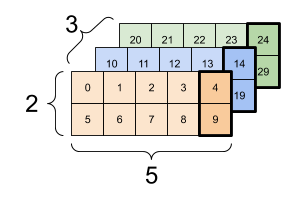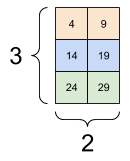

# **Manipulating Shapes**
Reshaping a tensor is of great utility.

In [17]:
# Shape returns a `TensorShape` object that shows the size on each dimension
x = tf.constant([[1], [2], [3]])
print(x.shape)

(3, 1)


In [18]:
# You can convert this object into a Python list, too
print(x.shape.as_list())

[3, 1]


In [19]:
# You can reshape a tensor to a new shape.
# Note that you're passing in a list
reshaped = tf.reshape(x, [1, 3])
print("Original X is:",x)
print("Original X shape is:",x.shape)
print("Reshaped X is:",reshaped)
print("Reshaped X shape is:",reshaped.shape)

Original X is: tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32)
Original X shape is: (3, 1)
Reshaped X is: tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)
Reshaped X shape is: (1, 3)


In [20]:
print(rank_3_tensor,"\n")
# A `-1` passed in the `shape` argument says "Whatever fits".
print("Flatening it \n",tf.reshape(rank_3_tensor, [-1]))

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32) 

Flatening it 
 tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)


Typically the only reasonable uses of tf.reshape are to combine or split adjacent axes (or add/remove 1s).

For this 3x2x5 tensor, reshaping to (3x2)x5 or 3x(2x5) are both reasonable things to do, as the slices do not mix:

Reshaping will "work" for any new shape with the same total number of elements, but it will not do anything useful if you do not respect the order of the axes.

Swapping axes in tf.reshape does not work, you need tf.transpose for that.

In [21]:
print(tf.reshape(rank_3_tensor, [3*2, 5]), "\n")
print(tf.reshape(rank_3_tensor, [3, -1]))

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)


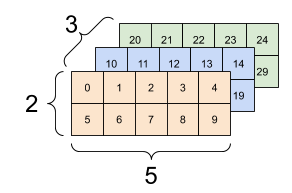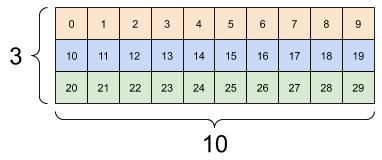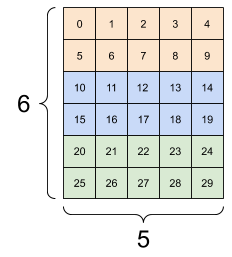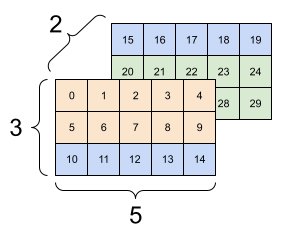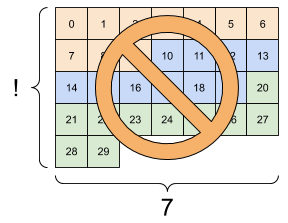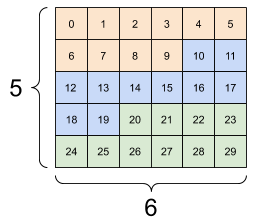

In [22]:
# Bad examples: don't do this

# You can't reorder axes with reshape.
print(tf.reshape(rank_3_tensor, [2, 3, 5]), "\n") 

# This is a mess
print(tf.reshape(rank_3_tensor, [5, 6]), "\n")

# This doesn't work at all
try:
  tf.reshape(rank_3_tensor, [7, -1])
except Exception as e:
  print(f"{type(e).__name__}: {e}")

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]], shape=(2, 3, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]], shape=(5, 6), dtype=int32) 

InvalidArgumentError: Input to reshape is a tensor with 30 values, but the requested shape requires a multiple of 7 [Op:Reshape]


You may run across not-fully-specified shapes. Either the shape contains a `None` (a dimension's length is unknown) or the shape is `None` (the rank of the tensor is unknown).

Except for [tf.RaggedTensor](#ragged_tensors), such shapes will only occur in the context of TensorFlow's symbolic, graph-building  APIs:

* [tf.function](function.ipynb) 
* The [keras functional API](keras/functional.ipynb).


## More on `DTypes`

To inspect a `tf.Tensor`'s data type use the `Tensor.dtype` property.

When creating a `tf.Tensor` from a Python object you may optionally specify the datatype.

If you don't, TensorFlow chooses a datatype that can represent your data. TensorFlow converts Python integers to `tf.int32` and Python floating point numbers to `tf.float32`. Otherwise TensorFlow uses the same rules NumPy uses when converting to arrays.

You can cast from type to type.

In [23]:
the_f64_tensor = tf.constant([2.2, 3.3, 4.4], dtype=tf.float64)
print(the_f64_tensor)
the_f16_tensor = tf.cast(the_f64_tensor, dtype=tf.float16)
print(the_f16_tensor)
# Now, cast to an uint8 and lose the decimal precision
the_u8_tensor = tf.cast(the_f16_tensor, dtype=tf.uint8)
print(the_u8_tensor)

tf.Tensor([2.2 3.3 4.4], shape=(3,), dtype=float64)
tf.Tensor([2.2 3.3 4.4], shape=(3,), dtype=float16)
tf.Tensor([2 3 4], shape=(3,), dtype=uint8)


## Broadcasting

Broadcasting is a concept borrowed from the [equivalent feature in NumPy](https://numpy.org/doc/stable/user/basics.html).  In short, under certain conditions, smaller tensors are "stretched" automatically to fit larger tensors when running combined operations on them.

The simplest and most common case is when you attempt to multiply or add a tensor to a scalar.  In that case, the scalar is broadcast to be the same shape as the other argument. 

In [24]:
x = tf.constant([1, 2, 3])

y = tf.constant(2)
z = tf.constant([2, 2, 2])
# All of these are the same computation
print(tf.multiply(x, 2))
print(x * y)
print(x * z)

tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)


Likewise, 1-sized dimensions can be stretched out to match the other arguments. Both arguments can be stretched in the same computation.

In this case a 3x1 matrix is element-wise multiplied by a 1x4 matrix to produce a 3x4 matrix. Note how the leading 1 is optional: The shape of y is [4].

In [25]:
# These are the same computations
x = tf.reshape(x,[3,1])
y = tf.range(1, 5)
print(x, "\n")
print(y, "\n")
print(tf.multiply(x, y))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32) 

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32) 

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


Same operation without broadcasting


In [26]:
x_stretch = tf.constant([[1, 1, 1, 1],
                         [2, 2, 2, 2],
                         [3, 3, 3, 3]])

y_stretch = tf.constant([[1, 2, 3, 4],
                         [1, 2, 3, 4],
                         [1, 2, 3, 4]])

print(x_stretch * y_stretch)  # Again, operator overloading

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


In [27]:
print(tf.broadcast_to(tf.constant([1, 2, 3]), [3, 3]))

tf.Tensor(
[[1 2 3]
 [1 2 3]
 [1 2 3]], shape=(3, 3), dtype=int32)


## tf.convert_to_tensor

Most ops, like `tf.matmul` and `tf.reshape` take arguments of class `tf.Tensor`.  However, you'll notice in the above case, Python objects shaped like tensors are accepted.

Most, but not all, ops call `convert_to_tensor` on non-tensor arguments.  There is a registry of conversions, and most object classes like NumPy's `ndarray`, `TensorShape`, Python lists, and `tf.Variable` will all convert automatically.


## Ragged Tensors

A tensor with variable numbers of elements along some axis is called "ragged". Use `tf.ragged.RaggedTensor` for ragged data.

For example, This cannot be represented as a regular tensor: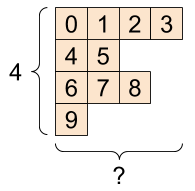

In [28]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

In [29]:
try:
  tensor = tf.constant(ragged_list)
except Exception as e:
  print(f"{type(e).__name__}: {e}")

ValueError: Can't convert non-rectangular Python sequence to Tensor.


In [30]:
ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor)

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>


In [31]:
print(ragged_tensor.shape)

(4, None)


## String tensors

`tf.string` is a `dtype`, which is to say you can represent data as strings (variable-length byte arrays) in tensors.

The strings are atomic and cannot be indexed the way Python strings are. The length of the string is not one of the dimensions of the tensor. See `tf.strings` for functions to manipulate them.

In [32]:
# Tensors can be strings, too here is a scalar string.
scalar_string_tensor = tf.constant("Gray wolf")
print(scalar_string_tensor)

tf.Tensor(b'Gray wolf', shape=(), dtype=string)


Vector of Strings 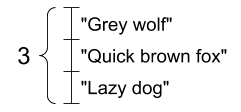

In [33]:
# If you have three string tensors of different lengths, this is OK.
tensor_of_strings = tf.constant(["Gray wolf",
                                 "Quick brown fox",
                                 "Lazy dog"])
# Note that the shape is (3,). The string length is not included.
print(tensor_of_strings)

tf.Tensor([b'Gray wolf' b'Quick brown fox' b'Lazy dog'], shape=(3,), dtype=string)


In the above printout the `b` prefix indicates that `tf.string` dtype is not a unicode string, but a byte-string. See the [Unicode Tutorial](https://www.tensorflow.org/tutorials/load_data/unicode) for more about working with unicode text in TensorFlow.

In [34]:
tf.constant("🥳👍")

<tf.Tensor: shape=(), dtype=string, numpy=b'\xf0\x9f\xa5\xb3\xf0\x9f\x91\x8d'>

In [35]:
# You can use split to split a string into a set of tensors
print(tf.strings.split(scalar_string_tensor, sep=" "))

tf.Tensor([b'Gray' b'wolf'], shape=(2,), dtype=string)


In [36]:
# ...but it turns into a `RaggedTensor` if you split up a tensor of strings,
# as each string might be split into a different number of parts.
print(tf.strings.split(tensor_of_strings))

<tf.RaggedTensor [[b'Gray', b'wolf'], [b'Quick', b'brown', b'fox'], [b'Lazy', b'dog']]>


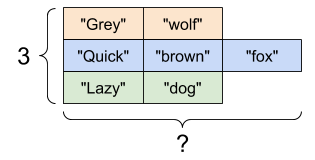

In [37]:
text = tf.constant("1 10 100")
print(tf.strings.to_number(tf.strings.split(text, " ")))

tf.Tensor([  1.  10. 100.], shape=(3,), dtype=float32)


Although you can't use `tf.cast` to turn a string tensor into numbers, you can convert it into bytes, and then into numbers.

In [39]:
byte_strings = tf.strings.bytes_split(tf.constant("Duck"))
byte_ints = tf.io.decode_raw(tf.constant("Duck"), tf.uint8)
print("Byte strings:", byte_strings)
print("Bytes:", byte_ints)

Byte strings: tf.Tensor([b'D' b'u' b'c' b'k'], shape=(4,), dtype=string)
Bytes: tf.Tensor([ 68 117  99 107], shape=(4,), dtype=uint8)


In [40]:
# Or split it up as unicode and then decode it
unicode_bytes = tf.constant("アヒル 🦆")
unicode_char_bytes = tf.strings.unicode_split(unicode_bytes, "UTF-8")
unicode_values = tf.strings.unicode_decode(unicode_bytes, "UTF-8")

print("\nUnicode bytes:", unicode_bytes)
print("\nUnicode chars:", unicode_char_bytes)
print("\nUnicode values:", unicode_values)


Unicode bytes: tf.Tensor(b'\xe3\x82\xa2\xe3\x83\x92\xe3\x83\xab \xf0\x9f\xa6\x86', shape=(), dtype=string)

Unicode chars: tf.Tensor([b'\xe3\x82\xa2' b'\xe3\x83\x92' b'\xe3\x83\xab' b' ' b'\xf0\x9f\xa6\x86'], shape=(5,), dtype=string)

Unicode values: tf.Tensor([ 12450  12498  12523     32 129414], shape=(5,), dtype=int32)


## Sparse tensors

Sometimes, the data is sparse, like a very wide embedding space.  TensorFlow supports `tf.sparse.SparseTensor` and related operations to store sparse data efficiently.




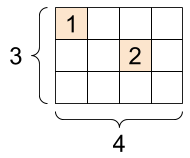

In [41]:
# Sparse tensors store values by index in a memory-efficient manner
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
print(sparse_tensor, "\n")

# You can convert sparse tensors to dense
print(tf.sparse.to_dense(sparse_tensor))

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64)) 

tf.Tensor(
[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]], shape=(3, 4), dtype=int32)
